In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

Question no 1 - A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [2]:
#importing the csv file
from google.colab import files
uploaded = files.upload()

Saving Cutlets.csv to Cutlets.csv


In [4]:
Data =pd.read_csv("Cutlets.csv")
Data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu,f_oneway

In [9]:
a = Data["Unit A"]
b = Data["Unit B"]

In [10]:
# Performing the independent two-sample t-test
t_stat, pvalue = stats.ttest_ind(a, b)

In [11]:
bins = np.linspace(min(a), max(a), 10)
bins = np.sort(bins)

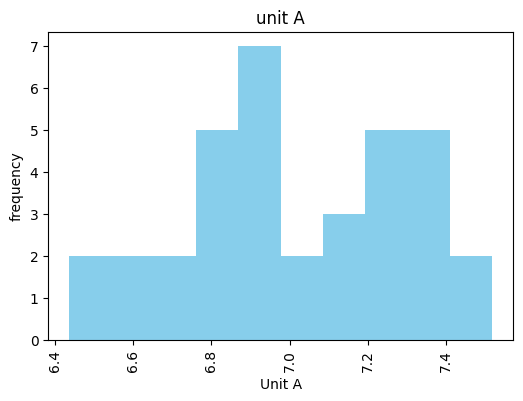

In [12]:
# Creating a histogram of the data
plt.figure(figsize=(6, 4))
plt.hist(a, bins=10, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Unit A')
plt.ylabel('frequency')
plt.title('unit A')
plt.show()

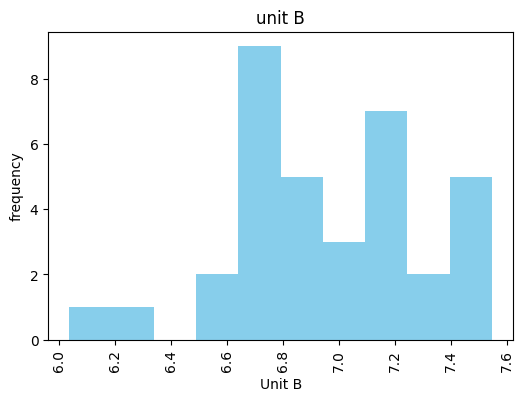

In [13]:
# Creating a histogram of the data
plt.figure(figsize=(6, 4))
plt.hist(b, bins=10, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Unit B')
plt.ylabel('frequency')
plt.title('unit B')
plt.show()

In [14]:
# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


2nd Question A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch

In [6]:
from google.colab import files
uploaded=files.upload()

Saving LabTAT.csv to LabTAT.csv


In [15]:
Lab = pd.read_csv("LabTAT.csv")
Lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [16]:
#Converting the data into a DataFrame
df = pd.DataFrame(Lab)


In [17]:
Lab1 = [["Laboratory 1","Laboratory 2","Laboratory 3" , "Laboratory 4"]]

In [18]:
#Creating a contingency table
# Melting the dataframe to have columns 'Lab' and 'Tat reports'
melted_df = df.melt(var_name='Lab', value_name='Tat reports')

In [19]:
#Create the contingency table
contingency_table = pd.crosstab(melted_df['Lab'], melted_df['Tat reports'])

In [23]:
!pip install scipy
import scipy.stats as stats

In [25]:
!pip install scipy
import scipy.stats as stats

# Performing the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [26]:
# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 1412.0
P-Value: 0.4129934435449887
Degrees of Freedom: 1401
Expected Frequencies:
[[0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]]


In [27]:
#Interpreing the results
alpha = 0.05
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 1412.0
P-Value: 0.4129934435449887


In [28]:
# alpha =0.5
if p < alpha:
    print(" (reject H0).")
else:
    print(" (fail to reject H0).")

 (fail to reject H0).


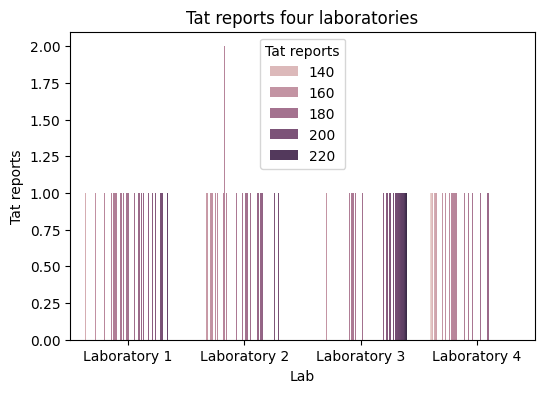

In [29]:
# Creating the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=melted_df, x='Lab', hue='Tat reports')
plt.title('Tat reports four laboratories')
plt.xlabel('Lab')
plt.ylabel('Tat reports')
plt.legend(title='Tat reports')
plt.show()

In [30]:
# Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in average TAT among the laboratories.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in average TAT among the laboratories.")

NameError: name 'p_value' is not defined


Question No 3 Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [33]:
!pip install researchpy
from scipy.stats  import chi2_contingency
import researchpy as rp
import numpy as np
import sys

In [32]:
from statsmodels.stats.proportion import proportions_chisquare

In [7]:
from google.colab import files
uploaded = files.upload()

Saving BuyerRatio.csv to BuyerRatio.csv


In [31]:
df2 = pd.read_csv("BuyerRatio.csv")
df2

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [34]:
#importing the data
data = np.array([[50, 435],  # East
                 [142, 1532],  # West
                 [131, 1356],  # North
                 [70 , 750]]) # South

regions = ['East', 'West', 'North', 'south']
male_counts = data[:, 0]
female_counts = data[:, 1]

In [35]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(data)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 1.6577146592066643
P-Value: 0.6463753422699474
Degrees of Freedom: 3
Expected Frequencies:
[[  42.67913121  442.32086879]
 [ 147.30900134 1526.69099866]
 [ 130.85333632 1356.14666368]
 [  72.15853112  747.84146888]]


In [36]:
# Significance level
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: The male-to-female buyer ratios differ across regions.")
else:
    print("Fail to reject the null hypothesis: The male-to-female buyer ratios are similar across regions.")

Fail to reject the null hypothesis: The male-to-female buyer ratios are similar across regions.


In [37]:
# Set the positions and width for the bars
positions = np.arange(len(regions))
width = 0.35

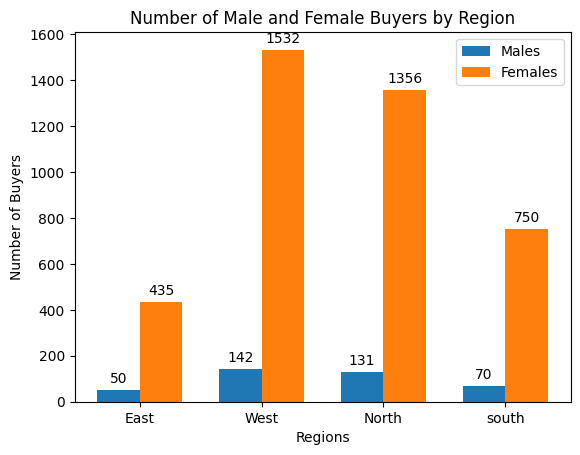

In [38]:
# Creating the plot
fig, ax = plt.subplots()

# Plot bars
bars1 = ax.bar(positions - width/2, male_counts, width, label='Males')
bars2 = ax.bar(positions + width/2, female_counts, width, label='Females')

# Adding some text for labels, title, and axes ticks
ax.set_xlabel('Regions')
ax.set_ylabel('Number of Buyers')
ax.set_title('Number of Male and Female Buyers by Region')
ax.set_xticks(positions)
ax.set_xticklabels(regions)
ax.legend()

# Attaching a text label above each bar in *bars*, displaying its height
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Display the plot
plt.show()

Question no - 4 TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [39]:
# Installing necessary libraries
!pip install pandas scipy
!pip install openpyxl

import pandas as pd
import numpy as np
from scipy.stats import chi2 ,chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
#importing the csv file
from google.colab import files
uploaded = files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm.csv


In [40]:
Df1 =pd.read_csv("Costomer+OrderForm.csv")
Df1.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [41]:
Center = ['Phillippines', 'Indonesia', 'Malta', 'India']

In [42]:
Df1.value_counts()

Phillippines  Indonesia   Malta       India     
Error Free    Error Free  Error Free  Error Free    206
Defective     Error Free  Error Free  Error Free     21
Error Free    Defective   Error Free  Error Free     20
              Error Free  Defective   Error Free     18
                          Error Free  Defective      16
              Defective   Defective   Error Free      9
Defective     Error Free  Defective   Error Free      4
              Defective   Error Free  Error Free      2
              Error Free  Error Free  Defective       2
Error Free    Defective   Error Free  Defective       2
Name: count, dtype: int64

In [43]:
Df1.Phillippines.value_counts()

Phillippines
Error Free    271
Defective      29
Name: count, dtype: int64

In [44]:
df = pd.DataFrame(Df1)

In [45]:
#Melting the dataframe to have columns 'Center' and 'Defective'
melted_df = df.melt(var_name='Center', value_name='Status')

In [46]:
# Creating the contingency table
contingency_table = pd.crosstab(melted_df['Center'], melted_df['Status'])
print("contigency_table")

# Step 4: Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

contigency_table


In [47]:
# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 3.8589606858203545
P-Value: 0.2771020991233144
Degrees of Freedom: 3
Expected Frequencies:
[[ 28.25 271.75]
 [ 28.25 271.75]
 [ 28.25 271.75]
 [ 28.25 271.75]]


In [48]:
#Interpreing the results
alpha = 0.05
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 3.8589606858203545
P-Value: 0.2771020991233144


In [49]:
# alpha =0.5
if p < alpha:
    print("The percentage of defective forms varies significantly by center (reject H0).")
else:
    print("The percentage of defective forms does not vary significantly by center (fail to reject H0).")

The percentage of defective forms does not vary significantly by center (fail to reject H0).


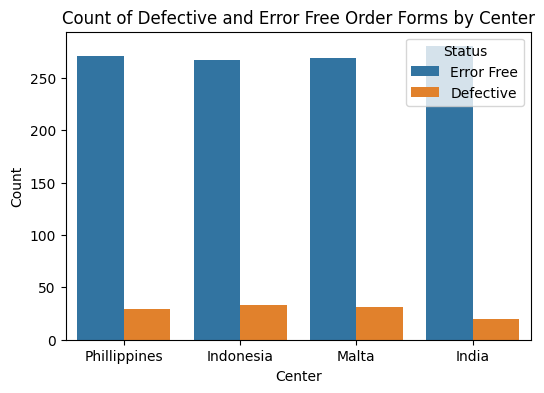

In [50]:
# Creating the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=melted_df, x='Center', hue='Status')
plt.title('Count of Defective and Error Free Order Forms by Center')
plt.xlabel('Center')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

chi square test between Phillippines and Indonesia: chi square statistic: 0.1856391005881107 p-value: 0.6665712150680798 We fail to reject the null hypothesis. This means there is no significant association between the two categorical variables. chi square test between Phillippines and Malta: chi square statistic: 0.1043743747062788 p-value: 0.7466420539639729 We fail to reject the null hypothesis. This means there is no significant association between the two categorical variables. chi square test between Phillippines and India: chi square statistic: 0.0 p-value: 1.0 We fail to reject the null hypothesis. This means there is no significant association between the two categorical variables. chi square test between Indonesia and Malta: chi square statistic: 9.52050868943337 *p-value: *0.0020318825161213722 we reject the null hypothesis. This means there is a significant association between the two categorical variables. chi square test between Indonesia and India: chi square statistic: 0.0 p-value: 1.0 We fail to reject the null hypothesis. This means there is no significant association between the two categorical variables. chi square test between Malta and India: chi square statistic: 1.419106436194816 p-value: 0.23355053527979247 We fail to reject the null hypothesis. This means there is no significant association between the two categorical variables.